# Introduction to Python programming for scientific applications


## Day 2
* Part 1: More of the basics
 * A new data type: the *dictionary*

 * Reading from and writing to files

 * Interpret content in files via string manipulation
 
 * Creating our own modules
 
 
* Part 2: Data processing with pandas
 * Pandas overview
 * Reading and processing csv data files

## A dictionary is a generalization of a list

 Recall the basic features of lists: 

   * store a *sequence* of elements in a single object (`[1,3,-1]`)

   * each element is a Python object

   * the elements are indexed by integers 0, 1, ...

The dictionary is a generalization of lists, where the indices can be numbers, text or other object. The dictionary in Python is hash, HashMap and associative array in other languages. Dictionaries are useful because the list index is sometimes unnatural for locating an element of a collection of objects. 

As an example, suppose we need to store the temperatures in Oslo, London and Paris. A solution based on lists may look like:

In [2]:
temps = [13, 15.4, 17.5]
cities = ['Oslo','London','Paris']
print('The temperature in {} is {} degrees'.format(cities[0], temps[0]))

The temperature in Oslo is 13 degrees


We can look up a temperature by mapping a city and associated temperature to the same index, but it would be more natural to write `temps[Oslo]` directly. This is precisely what a dictionary allows, by providing a direct mapping from strings to objects:

In [3]:
# Initialize dictionary
temps = {'Oslo': 13, 'London': 15.4, 'Paris': 17.5}

# Applications
print('The temperature in London is', temps['London'])
print('The temperature in Oslo is',   temps['Oslo'])

The temperature in London is 15.4
The temperature in Oslo is 13


Important:

 * The string index, like `Oslo`, is called *key*, while `temps['Oslo']`
   is the associated *value*

 * A dictionary is an *unordered* collection of key-value pairs
 
 * Any immutable Python object can be used as a dictionary key; for instance an integer, string, tuple (but not a list)



## Initializing and manipulating dictionaries

Two ways of initializing a collection of key-value pairs:

In [4]:
temps = {'Oslo': 13, 'London': 15.4, 'Paris': 17.5}
# or
temps = dict(Oslo=13, London=15.4, Paris=17.5)
print(temps)

{'Oslo': 13, 'London': 15.4, 'Paris': 17.5}


A dictionary has no `append()`-function. To add a new element, we simply introduce a new key and associated value:

In [5]:
temps['Madrid'] = 26.0
print(temps)

{'Oslo': 13, 'London': 15.4, 'Paris': 17.5, 'Madrid': 26.0}


Looping (iterating) over a dictionary means looping over the keys:

Example:

In [6]:
for city in temps:
  print(f'The {city} temperature is {temps[city]}')

The Oslo temperature is 13
The London temperature is 15.4
The Paris temperature is 17.5
The Madrid temperature is 26.0


Note: the sequence of keys is arbitrary! Use `sorted` if you need a
particular sequence:

In [7]:
for city in sorted(temps):   # alphabetic sort of keys
    value = temps[city]
    print(value)

15.4
26.0
13
17.5


### We can test for particular keys, delete elements, etc

Does the dict have a particular key?

In [8]:
if 'Berlin' in temps:
    print('Berlin:', temps['Berlin'])
else:
    print('No temperature data for Berlin')

No temperature data for Berlin


In [9]:
'Oslo' in temps     # standard boolean expression

True

Delete an element of a dict:

In [10]:
del temps['Oslo']   # remove Oslo key w/value
temps

{'London': 15.4, 'Madrid': 26.0, 'Paris': 17.5}

In [11]:
len(temps)          # no of key-value pairs in dict.

3

### Example: Polynomials represented by dictionaries

The information in the polynomial

$$
p(x)=-1 + x^2 + 3x^7
$$

can be represented by a dict with power as key (`int`) and
coefficient as value (`float`):

In [12]:
p = {0: -1, 2: 1, 7: 3.5}

Evaluate such a polynomial $\sum_{i\in I} c_ix^i$ for some $x$:

In [13]:
def eval_poly_dict(poly, x):
    sum = 0.0
    for power in poly:
        sum += poly[power]*x**power
    return sum

Short pro version:

In [14]:
def eval_poly_dict2(poly, x):
    # Python's sum can add elements of an iterator
    return sum(poly[power]*x**power for power in poly)

### Quick exercise: adding polynomials

Write a function `poly_add(p1, p2)` which takes as input two dictionaries representing polynomials, and returns the dictionary representing the sum of the two polynomials. 

In [15]:
def poly_add(p1,p2):
    pass

## Reading data from files

Python has multiple ways to read data from a regular textfile:

In [16]:
infile  = open('filename.txt', 'r') # open file for reading

line    = infile.readline()   # read the next line
filestr = infile.read()       # read rest of file into string
lines   = infile.readlines()  # read rest of file into list
for line in infile:           # read rest of file line by line
    pass
infile.close()                # recall to close!

FileNotFoundError: [Errno 2] No such file or directory: 'filename.txt'

All the variables read from the file above are Python `string` objects. Specifically, `line` is a string, `filestr` is a (potentially long) string, and `lines` is a list of
strings. To process the contents of a text file, we need tools to interpret and manipulate strings. The Python language has a large selection of such tools, which makes string and file processing very convenient. 

A string is simply a sequence of characters, which can be indexed, traversed in a for-loop etc., much like we have done with lists:

In [ ]:
s1 = 'All work and no play makes Jack a dull boy.'
for c in s1:
    print(c,end=' ')
    
for i in range(len(s1)):
    print(s1[i],end=' ')

But unlike lists, strings are immutable objects, so an operation like `s1[0] = a` is not allowed. 

For reading and processing strings, Python has a number of useful tools:

In [ ]:
#split string into words:
words = s1.split()
print(words)

#split with user-defined delimiter:
print(s1.split('k'))

#join a list of strings to one:
print('_'.join(words))

#find a particular substring:
print(s1.find('play'))

#is a substring contained in a string:
print('dull' in s1)

#extract a substring by slicing:
print(s1[:8])

In [ ]:
#strip away leading and trailing whitespace:
s = '   text with leading/trailing space   '
s.strip()
#convert a string to a number:
n = '2.3'
float(n)

## Example: Read file data into a dictionary

Suppose we have data in a text file with the following format:

We want to store the data in a dictionary, with the city names as the keys and temperatures as values.

**Program:**

In [ ]:
infile = open('deg2.txt', 'r')
temps = {}                  # start with empty dict
infile.readline()           #skip the first line
for line in infile:
    city, temp = line.split()
    city = city[:-1]        # remove last char (:)
    temps[city]  = float(temp)
    
print(temps)

### Exercise 1: Read tabular data into a nested dictionary

**Data file `stars.txt`:**

We want to read the data from this file and store in a nested dictionary. In the main (outer) dictionary the key shall be the name of the star, and the corresponding value shall be a dictionary with keys `distance`, `brightness`, and `luminosity`, and the corresponding values as values. 

In [ ]:
infile = open('stars.txt','r')

#your code here

## Exercise 2: Read and plot climate data
Historical climate data is available from various meteorological services. We have downloaded data from the Oxford station of the UK metoffice. The data is in a text file with the following format:

Read the file and plot the maximum temperature as a function of the year. A dictionary can be used for this exercise, but for the purpose of plotting it may be just as easy to store the column data as separate lists. 

**Algorithm:**

 1. Skip the first 7 (for us uninteresting) lines

 2. Read the column data and store column 1 and 3 in lists

 3. Plot the data

In [ ]:
"""
Data file from:
http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata
"""

filename = 'oxford.txt'
infile = open(filename,'r')

#skip a few lines:
for i in range(7):
    infile.readline()
    

"""
Replace the line below with a for-loop to read the rest of the file line by line, 
and store the variables of interest as below with code to 
"""
print(infile.readline())

## Summary of dictionary functionality

<table border="1">
<thead>
<tr><th align="center">            Construction            </th> <th align="center">                 Meaning                  </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>a = {}</code>                                </td> <td align="left">   initialize an empty dictionary                </td> </tr>
<tr><td align="left">   <code>a = {'point': [0,0.1], 'value': 7}</code>    </td> <td align="left">   initialize a dictionary                       </td> </tr>
<tr><td align="left">   <code>a = dict(point=[2,7], value=3)</code>        </td> <td align="left">   initialize a dictionary w/string keys         </td> </tr>
<tr><td align="left">   <code>a.update(b)</code>                           </td> <td align="left">   add/update key-value pairs from <code>b</code> in <code>a</code>    </td> </tr>
<tr><td align="left">   <code>a.update(key1=value1, key2=value2)</code>    </td> <td align="left">   add/update key-value pairs in <code>a</code>             </td> </tr>
<tr><td align="left">   <code>a['hide'] = True</code>                      </td> <td align="left">   add new key-value pair to <code>a</code>                 </td> </tr>
<tr><td align="left">   <code>a['point']</code>                            </td> <td align="left">   get value corresponding to key <code>point</code>        </td> </tr>
<tr><td align="left">   <code>for key in a:</code>                         </td> <td align="left">   loop over keys in unknown order               </td> </tr>
<tr><td align="left">   <code>for key in sorted(a):</code>                 </td> <td align="left">   loop over keys in alphabetic order            </td> </tr>
<tr><td align="left">   <code>'value' in a</code>                          </td> <td align="left">   <code>True</code> if string <code>value</code> is a key in <code>a</code>      </td> </tr>
<tr><td align="left">   <code>del a['point']</code>                        </td> <td align="left">   delete a key-value pair from <code>a</code>              </td> </tr>
<tr><td align="left">   <code>list(a.keys())</code>                        </td> <td align="left">   list of keys                                  </td> </tr>
<tr><td align="left">   <code>list(a.values())</code>                      </td> <td align="left">   list of values                                </td> </tr>
<tr><td align="left">   <code>len(a)</code>                                </td> <td align="left">   number of key-value pairs in <code>a</code>              </td> </tr>
<tr><td align="left">   <code>isinstance(a, dict)</code>                   </td> <td align="left">   is <code>True</code> if <code>a</code> is a dictionary              </td> </tr>
</tbody>
</table>

## Summary of some string operations

In [ ]:
s = 'Berlin: 18.4 C at 4 pm'
s[8:17]          # extract substring
s.find(':')      # index where first ':' is found
s.split(':')     # split into substrings
s.split()        # split wrt whitespace
'Berlin' in s    # test if substring is in s
s.replace('18.4', '20')
s.lower()        # lower case letters only
s.upper()        # upper case letters only
s.split()[4].isdigit()
s.strip()        # remove leading/trailing blanks
', '.join(list_of_words)

### Exercise 3: read data using pandas




In [18]:
import pandas as pd
filename = 'data/oxford.txt'

df = pd.read_csv(filename, delim_whitespace = True, skiprows = 7,header= None)
df.columns = ['year','month','high','low','days','rain','sun']

df

,year,month,high,low,days,rain,sun
0,1853,1,8.4,2.7,4,62.8,---
1,1853,2,3.2,-1.8,19,29.3,---
2,1853,3,7.7,-0.6,20,25.9,---
3,1853,4,12.6,4.5,0,60.1,---
4,1853,5,16.8,6.1,0,59.5,---
5,1853,6,20.1,10.7,0,82.0,---
6,1853,7,21.2,12.2,0,86.2,---
7,1853,8,20.2,10.8,0,72.3,---
8,1853,9,17.3,8.4,0,51.3,---
9,1853,10,13.9,7.4,0,102.3,---


year      int64
month     int64
high     object
low      object
days     object
rain     object
sun      object
dtype: object


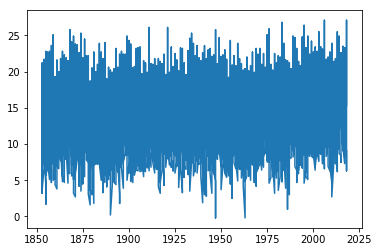

In [29]:
df['high'] = df['high'].apply(lambda x: str(x).replace('*',''))
print(df.dtypes)
df['high'] = df['high'].astype('float64')
df.dtypes

import matplotlib.pyplot as plt
plt.plot(df['year'],df['high'])
plt.show()

In [161]:
for c in ['high','low']:
    for i in range(len(df[c])):
        if i > 90 and i < 100:
            #if df[c][i] == '---':
            print('Yes!',df.loc[[i]])
    #df[c] = pd.to_numeric(df[c])


Yes!     year  month  high   low days  rain  sun
91  1860      8  17.9  10.9    0  96.7  ---
Yes!     year  month  high  low days  rain  sun
92  1860      9  15.6  7.0    0  64.0  ---
Yes!     year  month  high  low days  rain  sun
93  1860     10  13.4  7.3    1  39.9  ---
Yes!     year  month  high  low days  rain  sun
94  1860     11   7.4  2.1    2  82.1  ---
Yes!     year  month  high  low days  rain  sun
95  1860     12   4.4  ---  ---  66.6  ---
Yes!     year  month  high   low days  rain  sun
96  1861      1   3.8  -0.7   16  16.8  ---
Yes!     year  month  high  low days  rain  sun
97  1861      2   7.9  3.1    4  48.0  ---
Yes!     year  month  high  low days  rain  sun
98  1861      3  10.1  3.4    1  43.1  ---
Yes!     year  month  high  low days  rain  sun
99  1861      4  11.8  3.0    5  17.7  ---
Yes!     year  month  high   low days  rain  sun
91  1860      8  17.9  10.9    0  96.7  ---
Yes!     year  month  high  low days  rain  sun
92  1860      9  15.6  7.0    0  64.

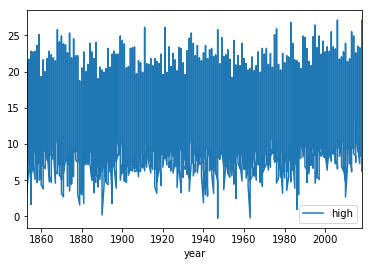

In [30]:
import matplotlib.pyplot as plt
df.plot('year','high')

plt.show()


In [37]:
df.to_hdf('./data/climate.hdf','oxford')

df2 = pd.read_hdf('./data/climate.hdf',key='oxford')
df2

,year,month,high,low,days,rain,sun
0,1853,1,8.4,2.7,4,62.8,---
1,1853,2,3.2,-1.8,19,29.3,---
2,1853,3,7.7,-0.6,20,25.9,---
3,1853,4,12.6,4.5,0,60.1,---
4,1853,5,16.8,6.1,0,59.5,---
5,1853,6,20.1,10.7,0,82.0,---
6,1853,7,21.2,12.2,0,86.2,---
7,1853,8,20.2,10.8,0,72.3,---
8,1853,9,17.3,8.4,0,51.3,---
9,1853,10,13.9,7.4,0,102.3,---
